In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("/content/WIPRO.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [53]:
data.drop(['Date'], axis=1, inplace=True)

In [54]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0  WIPRO     EQ     2522.40  2724.00  2724.20  2724.00  2724.20  2724.20   
1  WIPRO     EQ     2724.20  2942.15  2942.15  2942.15  2942.15  2942.15   
2  WIPRO     EQ     2942.15  2942.15  3177.55  2715.00  3000.00  2990.10   
3  WIPRO     EQ     2990.10  3144.70  3183.00  2790.00  2915.00  2932.25   
4  WIPRO     EQ     2932.25  2751.00  2751.00  2697.70  2697.70  2697.70   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  2724.17    1599  4.355942e+11     NaN                 NaN          NaN  
1  2942.15    4392  1.292192e+12     NaN                 NaN          NaN  
2  3063.86  132297  4.053390e+13     NaN                 NaN          NaN  
3  2962.41   72840  2.157822e+13     NaN                 NaN          NaN  
4  2697.95   10110  2.727630e+12     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
    

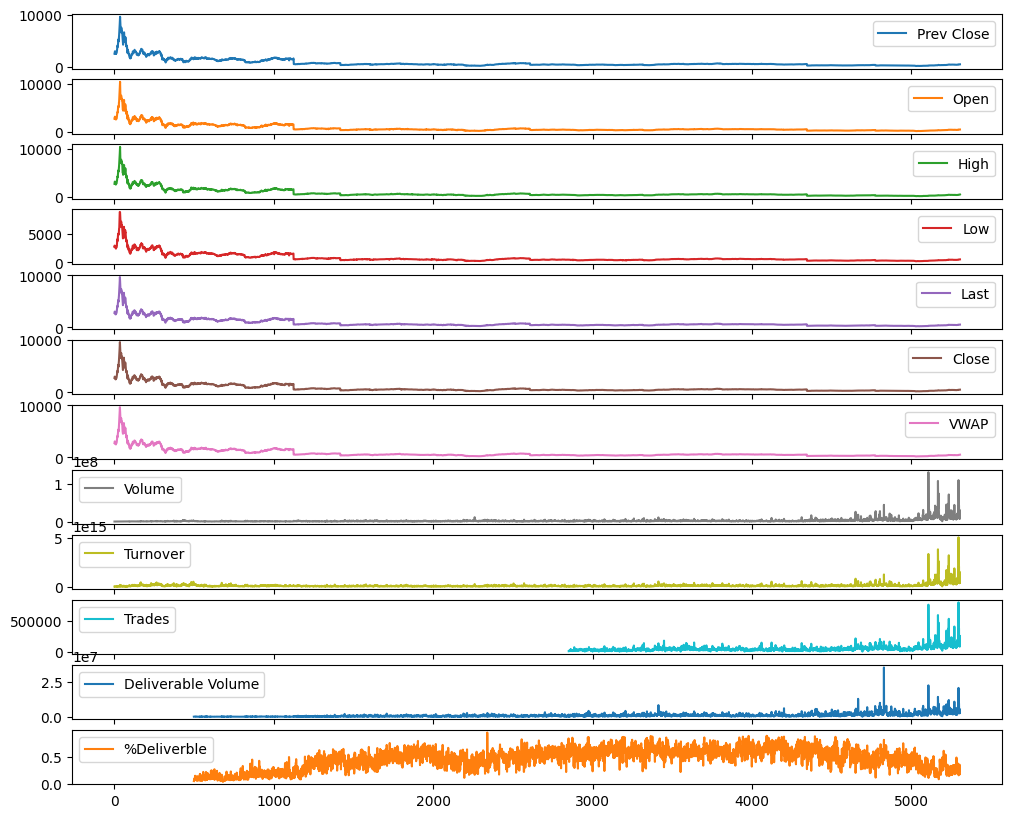

Symbol                   1
Series                   1
Prev Close            4441
Open                  3271
High                  3700
Low                   3898
Last                  3791
Close                 4441
VWAP                  5083
Volume                5304
Turnover              5306
Trades                2412
Deliverable Volume    4793
%Deliverble           3447
dtype: int64

In [55]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [56]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


     Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     WIPRO     EQ     2522.40  2724.00  2724.20  2724.00  2724.20  2724.20   
1     WIPRO     EQ     2724.20  2942.15  2942.15  2942.15  2942.15  2942.15   
2     WIPRO     EQ     2942.15  2942.15  3177.55  2715.00  3000.00  2990.10   
3     WIPRO     EQ     2990.10  3144.70  3183.00  2790.00  2915.00  2932.25   
4     WIPRO     EQ     2932.25  2751.00  2751.00  2697.70  2697.70  2697.70   
...     ...    ...         ...      ...      ...      ...      ...      ...   
5301  WIPRO     EQ      475.70   479.40   483.85   477.00   482.00   480.30   
5302  WIPRO     EQ      480.30   481.40   487.00   481.00   483.85   485.05   
5303  WIPRO     EQ      485.05   485.85   493.20   481.25   488.65   489.30   
5304  WIPRO     EQ      489.30   492.70   492.80   485.70   489.00   489.85   
5305  WIPRO     EQ      489.85   491.50   511.80   489.30   492.50   492.75   

         VWAP    Volume      Turnover    Trades  De

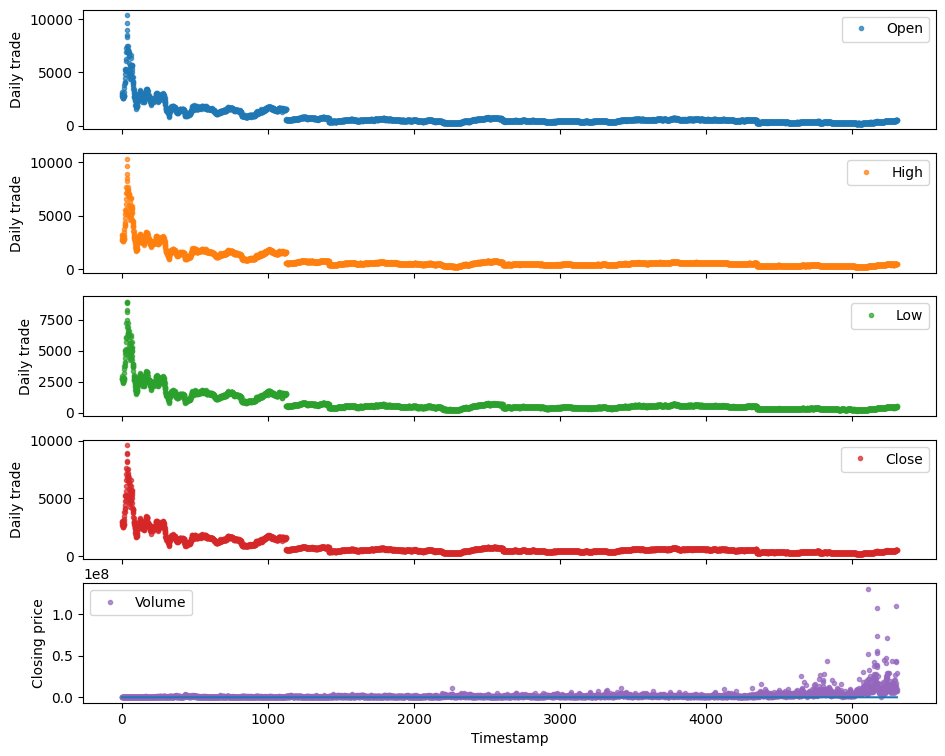

In [57]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [58]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

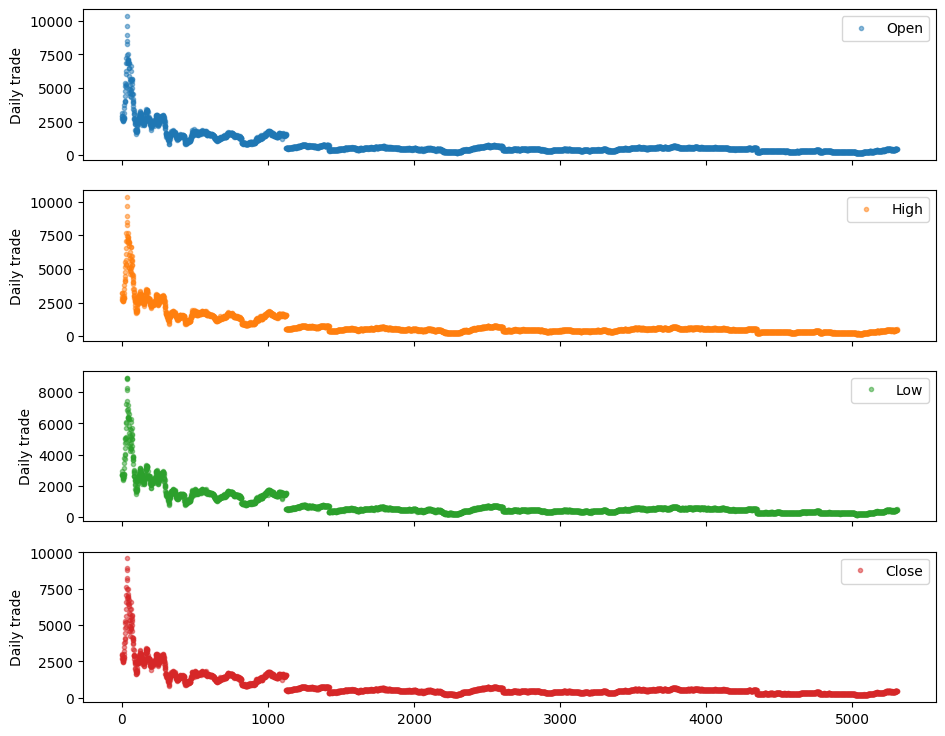

In [59]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     WIPRO     EQ     2522.40  2724.00  2724.20  2724.00  2724.20  2724.20   
1     WIPRO     EQ     2724.20  2942.15  2942.15  2942.15  2942.15  2942.15   
2     WIPRO     EQ     2942.15  2942.15  3177.55  2715.00  3000.00  2990.10   
3     WIPRO     EQ     2990.10  3144.70  3183.00  2790.00  2915.00  2932.25   
4     WIPRO     EQ     2932.25  2751.00  2751.00  2697.70  2697.70  2697.70   
...     ...    ...         ...      ...      ...      ...      ...      ...   
5301  WIPRO     EQ      475.70   479.40   483.85   477.00   482.00   480.30   
5302  WIPRO     EQ      480.30   481.40   487.00   481.00   483.85   485.05   
5303  WIPRO     EQ      485.05   485.85   493.20   481.25   488.65   489.30   
5304  WIPRO     EQ      489.30   492.70   492.80   485.70   489.00   489.85   
5305  WIPRO     EQ      489.85   491.50   511.80   489.30   492.50   492.75   

         VWAP    Volume      Turnover    Trades  De

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,7.548573e+02,7.945219e+02,1.623500e+02,3.805250e+02,5.034000e+02,6.792250e+02,9.587450e+03
Open,5306.0,7.568000e+02,8.033716e+02,1.631000e+02,3.805750e+02,5.040000e+02,6.800000e+02,1.035000e+04
High,5306.0,7.724784e+02,8.252595e+02,1.713500e+02,3.869000e+02,5.108000e+02,6.908875e+02,1.035000e+04
Low,5306.0,7.381509e+02,7.686133e+02,1.594000e+02,3.744750e+02,4.945000e+02,6.708125e+02,8.928350e+03
Last,5306.0,7.545224e+02,7.943835e+02,1.618000e+02,3.806125e+02,5.038000e+02,6.799250e+02,9.640000e+03
Close,5306.0,7.544748e+02,7.941593e+02,1.623500e+02,3.805250e+02,5.032500e+02,6.786875e+02,9.587450e+03
VWAP,5306.0,7.551655e+02,7.958257e+02,1.664400e+02,3.804800e+02,5.034500e+02,6.807950e+02,9.607140e+03
Volume,5306.0,2.236123e+06,4.827183e+06,1.003000e+03,6.937025e+05,1.152270e+06,2.004576e+06,1.303677e+08
Turnover,5306.0,1.024537e+14,1.741585e+14,4.355942e+11,4.319006e+13,6.579357e+13,1.075259e+14,5.075003e+15
Trades,2456.0,4.811294e+04,4.666250e+04,6.920000e+02,2.502100e+04,3.665950e+04,5.577275e+04,7.934710e+05


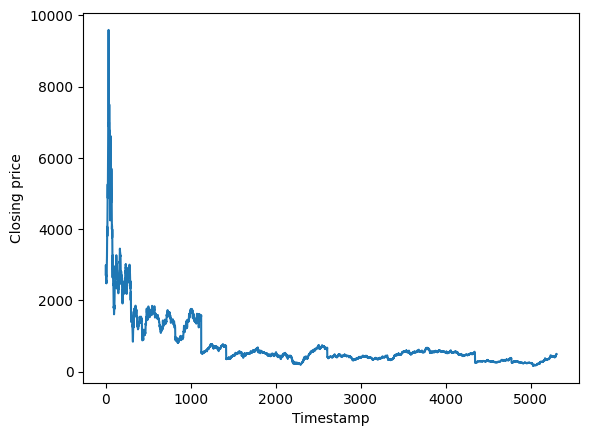

In [60]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [61]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [62]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 20ms/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1104 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0466
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0388 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0314
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0307 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0278
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0278 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0269
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0263 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0262
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0254 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0255
Epoch 7/100
66/66 [==

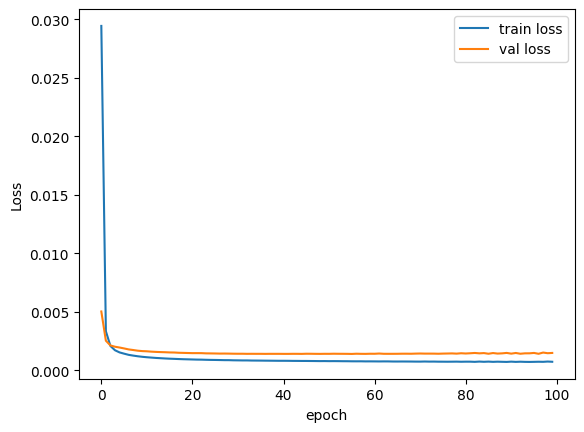

In [63]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

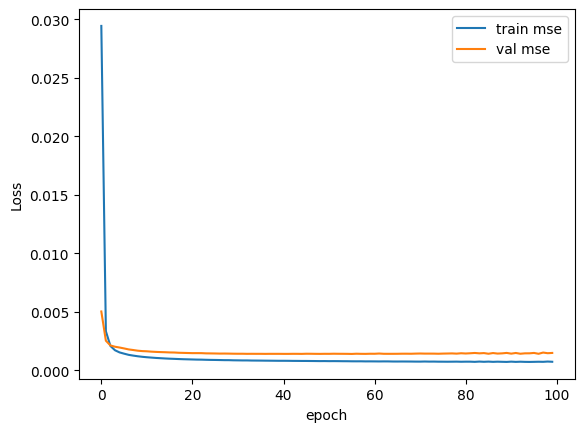

In [64]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

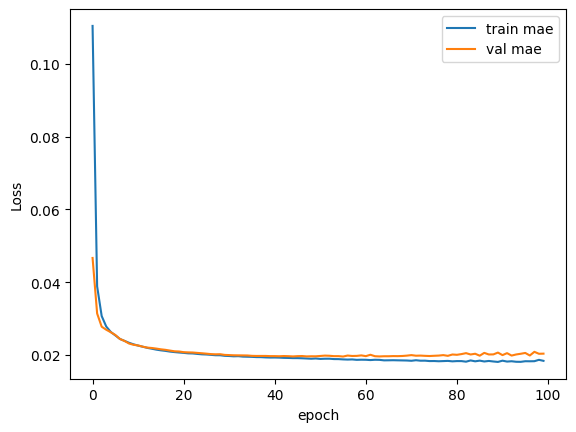

In [65]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_5 (LSTM)               (None, 32)                6272      
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)               

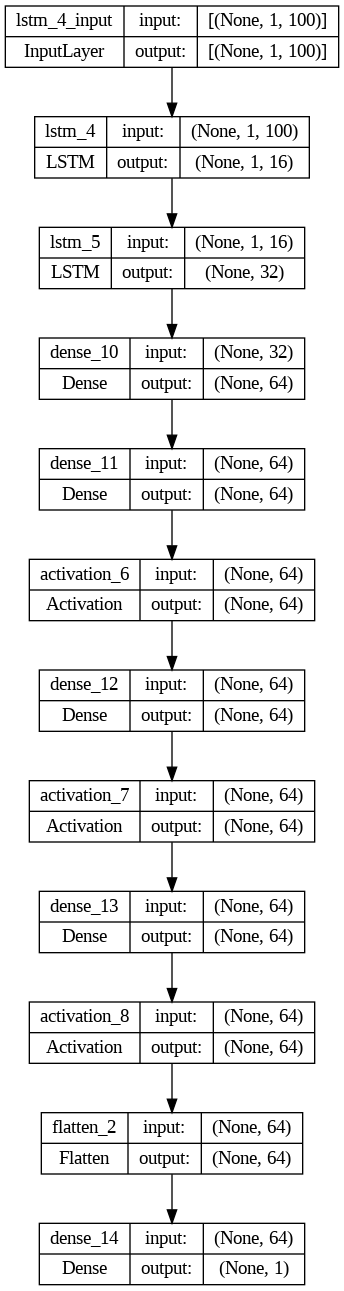

In [66]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [67]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0204    


[0.001494782161898911, 0.001494782161898911, 0.020352939143776894]

In [68]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.983396
R2 Score: 0.983221
Max Error: 0.558332


33/33 [==============================] - 0s 1ms/step


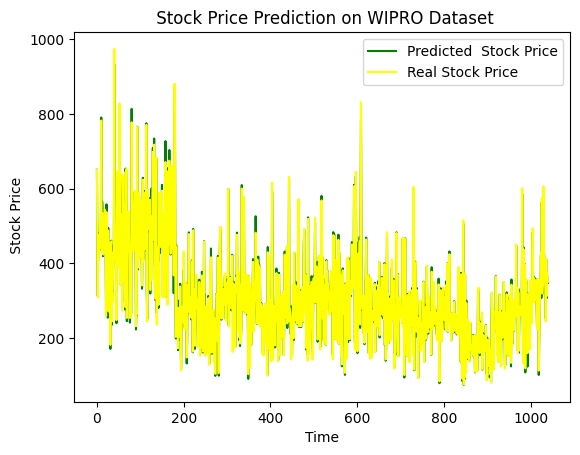

In [69]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on WIPRO Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

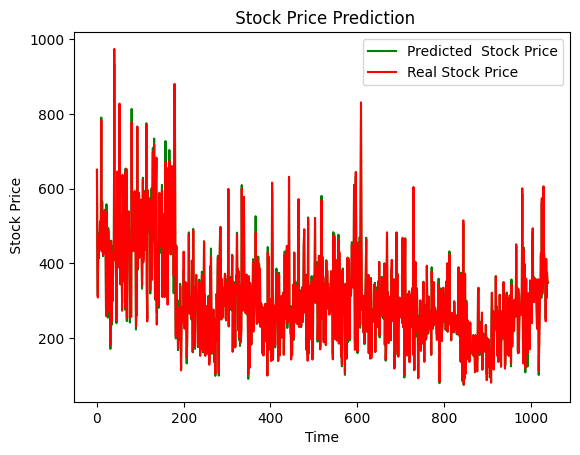

In [70]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [71]:
predicted

array([[650.5061 ],
       [409.18872],
       [312.875  ],
       ...,
       [374.34592],
       [345.81296],
       [347.73984]], dtype=float32)

In [72]:
test_label

array([[650.27856737],
       [403.75791212],
       [308.38084184],
       ...,
       [375.59673107],
       [352.06106409],
       [349.93802588]])

In [73]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       650.278567       650.506104
1       403.757912       409.188721
2       308.380842       312.875000
3       475.940334       480.332336
4       413.380446       416.057281
...            ...              ...
1036    411.915115       410.591980
1037    311.839038       306.604889
1038    375.596731       374.345917
1039    352.061064       345.812958
1040    349.938026       347.739838

[1041 rows x 2 columns]


In [74]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 650.2785673678226  |  650.506103515625  |
|  1   | 403.75791211815437 |  409.188720703125  |
|  2   | 308.3808418376232  |      312.875       |
|  3   | 475.9403336960465  | 480.33233642578125 |
|  4   | 413.3804464525365  | 416.0572814941406  |
|  5   | 475.72201907790145 | 471.9281921386719  |
|  6   | 440.5656006341195  | 435.3233947753906  |
|  7   | 512.4926461230798  | 503.8214416503906  |
|  8   | 510.8921296296296  | 508.1598205566406  |
|  9   | 483.17676912080054 | 482.7729797363281  |
|  10  | 782.2853087295955  | 790.4749755859375  |
|  11  | 431.7165019535738  | 439.0002136230469  |
|  12  | 521.4863741339492  | 565.7203369140625  |
|  13  | 533.9461400359066  |  530.072998046875  |
|  14  | 424.96705093614594 | 419.2437744140625  |
|  15  | 423.4745788964182  | 444.6247253417969  |
|  16  | 466.3657672674237  |  

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_5 (LSTM)               (None, 32)                6272      
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)               

In [76]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))